In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"H:\Data\......\bank+marketing\bank\bank-full.csv")

Dropping unrelated columns.

In [3]:
data= data.drop('contact', axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [6]:
columns= list(data.columns)

In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [8]:
for col in columns:
    if data[col].dtype == 'object':
        data[col]= le.fit_transform(data[col])

In [9]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,17,9,508,4,-1,0,3,0


In [10]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


### The positive correlation (+0.39) between "duration" and "y" suggests that longer conversations during the last contact are associated with a higher likelihood of the client subscribing to the term deposit.
#### Note: 1. The variable "y" indicates whether the client subscribed to a term deposit (binary outcome: "yes" or "no").
####           2. "duration" refers to the length of the last contact with a client during a marketing campaign, measured in seconds.

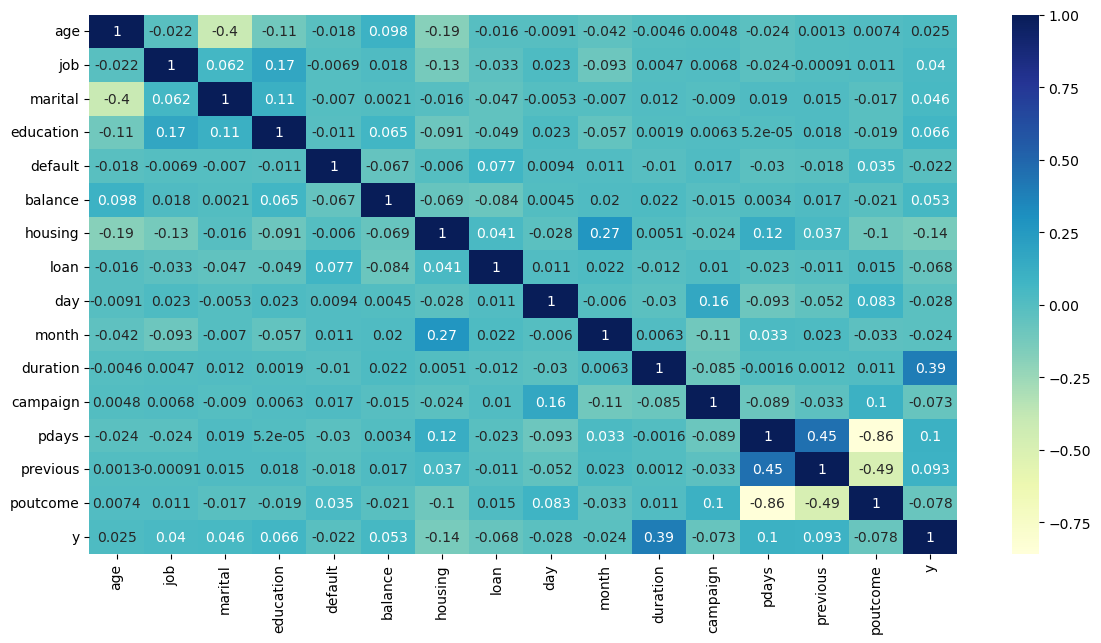

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot= True)
plt.show()

In [13]:
x= data.iloc[:, :-1]
y= data['y']
print(x.shape)
print(y.shape)

(45211, 15)
(45211,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.70, random_state= 42)

In [16]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
preds= dt.predict(x_test)

In [18]:
acc= accuracy_score(preds, y_test)
print(f'Accuracy score:', acc)

Accuracy score: 0.870023591860808


In [19]:
confusion_matrix(preds, y_test)

array([[11065,   862],
       [  901,   736]], dtype=int64)

In [20]:
depths= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df= pd.DataFrame(columns= ['Max_depths', 'Accuracy'])
df

,Max_depths,Accuracy


In [21]:
for input_parameter in depths:
    model= DecisionTreeClassifier(max_depth= input_parameter)
    model.fit(x_train, y_train)
    Mpreds= model.predict(x_test)
    Macc= accuracy_score(Mpreds, y_test)*100
    df= df.append({'Max_depths': input_parameter, 'Accuracy': Macc}, ignore_index= True)
df

,Max_depths,Accuracy
0,1.0,88.218815
1,2.0,88.712769
2,3.0,88.823356
3,4.0,89.184606
4,5.0,89.567974
5,6.0,89.663816
6,7.0,89.877617
7,8.0,89.752285
8,9.0,89.634326
9,10.0,89.450015


The decision tree classifier achieved optimal performance on this dataset when the maximum depth was set to 7.0.